In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_keyOpenweather

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_keyOpenweather}&units={units}&q="

In [3]:
#Your objective is to build a series of scatter plots to showcase the following relationships:

    #Temperature (F) vs. Latitude
    #Humidity (%) vs. Latitude
    #Cloudiness (%) vs. Latitude
    #Wind Speed (mph) vs. Latitude

In [4]:
cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.86, 51.51, 59.91, 39.91]
The temperature information received is: [12.49, 8.77, -2, 2]


In [5]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,temp
0,Paris,48.86,12.49
1,London,51.51,8.77
2,Oslo,59.91,-2.00
3,Beijing,39.91,2.00


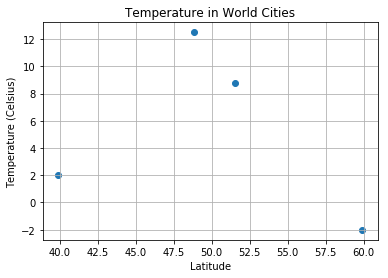

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()